In [1]:
import pandas as pd
import numpy as np 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder ,StandardScaler
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", message="The default value of `n_init` will change from 10 to 'auto' in 1.4.")
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak on Windows with MKL")
import os

In [2]:
data = pd.read_csv("employeeAfterCleaning.csv")

In [3]:
data

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance (Miles),Region,Age,Purchased Bike
0,12496,married,female,40000.0,1,Bachelors,Skilled Manual,YES,0,1,Europe,42.0,NO
1,24107,married,male,30000.0,3,Partial College,Clerical,YES,1,1,Europe,43.0,NO
2,14177,married,male,80000.0,5,Partial College,Professional,NO,2,5,Europe,60.0,NO
3,24381,single,male,70000.0,0,Bachelors,Professional,YES,1,10,Pacific,41.0,YES
4,25597,single,male,30000.0,0,Bachelors,Clerical,NO,0,1,Europe,36.0,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,18283,single,female,100000.0,0,Bachelors,Professional,NO,1,10,Pacific,40.0,NO
1000,19273,married,female,20000.0,2,Partial College,Manual,YES,0,1,Europe,63.0,NO
1001,22400,married,male,10000.0,0,Partial College,Manual,NO,1,1,Pacific,26.0,YES
1002,20942,single,female,20000.0,0,High School,Manual,NO,1,10,Europe,31.0,NO


In [4]:
categorical_cols = ['Marital Status', 'Gender', 'Education', 'Occupation', 'Home Owner', 'Region']
numerical_cols = ['Income','Commute Distance (Miles)', 'Age']

In [5]:
label_encoder = LabelEncoder()
data['Marital Status'] = label_encoder.fit_transform(data['Marital Status'])
data['Home Owner'] = label_encoder.fit_transform(data['Home Owner'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Purchased Bike'] = label_encoder.fit_transform(data['Purchased Bike'])
data['Education'] = label_encoder.fit_transform(data['Education'])
data['Occupation'] = label_encoder.fit_transform(data['Occupation'])
data['Region'] = label_encoder.fit_transform(data['Region'])

In [6]:
data

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance (Miles),Region,Age,Purchased Bike
0,12496,0,0,40000.0,1,0,4,1,0,1,0,42.0,0
1,24107,0,1,30000.0,3,3,0,1,1,1,0,43.0,0
2,14177,0,1,80000.0,5,3,3,0,2,5,0,60.0,0
3,24381,1,1,70000.0,0,0,3,1,1,10,2,41.0,1
4,25597,1,1,30000.0,0,0,0,0,0,1,0,36.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,18283,1,0,100000.0,0,0,3,0,1,10,2,40.0,0
1000,19273,0,0,20000.0,2,3,2,1,0,1,0,63.0,0
1001,22400,0,1,10000.0,0,3,2,0,1,1,2,26.0,1
1002,20942,1,0,20000.0,0,2,2,0,1,10,0,31.0,0


In [7]:
# numerical_transformer = StandardScaler()
# categorical_transformer = OneHotEncoder()

In [8]:
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numerical_transformer, numerical_cols),
#         ('cat', categorical_transformer, categorical_cols)
#     ])
# preprocessor

In [9]:
# data_preprocessed = preprocessor.fit_transform(data)

In [10]:
# columns = numerical_cols + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols))
# data_preprocessed_df = pd.DataFrame(data_preprocessed, columns=columns)

# data_preprocessed_df.head()

In [11]:
# Set the environment variable to avoid memory leak warning
os.environ['OMP_NUM_THREADS'] = '4'

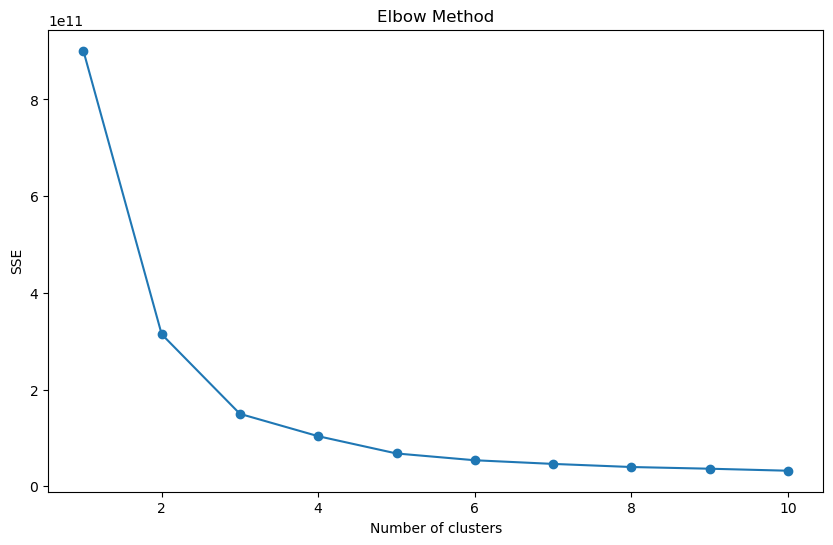

In [12]:
# Elbow method to find the optimal number of clusters
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)  # Explicitly setting n_init
    kmeans.fit(data)
    sse[k] = kmeans.inertia_

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(list(sse.keys()), list(sse.values()), marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.title("Elbow Method")
plt.show()

In [13]:
# Apply Cluster algorithm 
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(data)

data.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance (Miles),Region,Age,Purchased Bike,Cluster
0,12496,0,0,40000.0,1,0,4,1,0,1,0,42.0,0,4
1,24107,0,1,30000.0,3,3,0,1,1,1,0,43.0,0,4
2,14177,0,1,80000.0,5,3,3,0,2,5,0,60.0,0,3
3,24381,1,1,70000.0,0,0,3,1,1,10,2,41.0,1,1
4,25597,1,1,30000.0,0,0,0,0,0,1,0,36.0,1,4


In [14]:
# Add cluster labels to the original data
data['Cluster'] =  kmeans.labels_



In [15]:
# Analyze the clusters
numeric_data = data.select_dtypes(include=[np.number])
cluster_analysis = numeric_data.groupby('Cluster').mean()

print(cluster_analysis)

                   ID  Marital Status    Gender         Income  Children  \
Cluster                                                                    
0        19144.712121        0.378788  0.545455  122424.242424  2.106061   
1        19855.190909        0.406061  0.527273   62545.454545  2.145455   
2        20521.289474        0.539474  0.440789   15065.789474  1.440789   
3        19770.018405        0.496933  0.521472   86134.969325  2.766871   
4        20284.894198        0.498294  0.508532   35324.232082  1.286689   

         Education  Occupation  Home Owner      Cars  \
Cluster                                                
0         1.424242    1.712121    0.696970  3.075758   
1         1.260606    3.033333    0.742424  1.290909   
2         2.552632    1.657895    0.638158  1.085526   
3         1.239264    2.429448    0.650307  1.865031   
4         1.795222    1.720137    0.648464  1.150171   

         Commute Distance (Miles)    Region        Age  Purchased Bike  
C

In [17]:
#----------------------------------------------------

#----------------------------------------------------
#Applying KMeans Model 

'''
sklearn.cluster.KMeans(n_clusters=8, init='k-means++’, n_init=10, max_iter=300,tol=0.0001,
                       precompute_distances='auto’, verbose=0, random_state=None, copy_x=True,
                       n_jobs=None, algorithm='auto’)
'''

KMeansModel = KMeans(n_clusters=5,init='k-means++', #also can be random
                     random_state=33,algorithm= 'auto') # also can be full or elkan
KMeansModel.fit(data)


E:\semester 6\Data Science\lab\Annaconda\install\Lib\site-packages\sklearn\cluster\_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


KMeans(algorithm='auto', n_clusters=5, random_state=33)

In [19]:

#Calculating Details
print('KMeansModel centers are : ' , KMeansModel.cluster_centers_)
print('KMeansModel labels are : ' , KMeansModel.labels_)
print('KMeansModel intertia is : ' , KMeansModel.inertia_)#SSD
print('KMeansModel No. of iteration is : ' , KMeansModel.n_iter_)
print('----------------------------------------------------')


KMeansModel centers are :  [[ 1.98001379e+04  4.06896552e-01  5.24137931e-01  6.42758621e+04
   2.21724138e+00  1.35862069e+00  2.98275862e+00  7.24137931e-01
   1.34827586e+00  5.83793103e+00  1.18620690e+00  4.57586207e+01
   5.10344828e-01  1.00000000e+00]
 [ 2.02812222e+04  4.86486486e-01  5.13513514e-01  3.70870871e+04
   1.32732733e+00  1.64564565e+00  1.92192192e+00  6.75675676e-01
   1.11711712e+00  4.03903904e+00  6.87687688e-01  4.16876877e+01
   5.04504505e-01  3.63963964e+00]
 [ 1.91447121e+04  3.78787879e-01  5.45454545e-01  1.22424242e+05
   2.10606061e+00  1.42424242e+00  1.71212121e+00  6.96969697e-01
   3.07575758e+00  5.62121212e+00  9.24242424e-01  4.63939394e+01
   5.00000000e-01 -4.44089210e-16]
 [ 1.97700184e+04  4.96932515e-01  5.21472393e-01  8.61349693e+04
   2.76687117e+00  1.23926380e+00  2.42944785e+00  6.50306748e-01
   1.86503067e+00  4.96932515e+00  1.17791411e+00  4.65797546e+01
   4.41717791e-01  3.00000000e+00]
 [ 2.05212895e+04  5.39473684e-01  4.4078

In [22]:

#Calculating Prediction
y_pred = KMeansModel.predict(data)
print('Predicted Value for KMeansModel is : ' , y_pred[:10])# each row belong to which cluster

Predicted Value for KMeansModel is :  [1 1 3 0 1 4 1 4 2 1]


In [25]:
KMeansModel.labels_


array([1, 1, 3, ..., 4, 4, 3])

In [ ]:
pd.Series(KMeansModel.labels_).value_counts() #Cluster count
